# Increased pressure drop b/w fractinator and reactor scenario

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_excel('columns.xlsx')
col = df['Symbol'].values
col = col.tolist()

In [3]:
df_stableFeedFlow = pd.read_csv(r'C:\Users\akpra\OneDrive\Desktop\Fluid-Catalytic-Cracking-Unit-Dataset-for-Process-Monitoring-Evaluation-main\NOC_stableFeedFlow_outputs.csv',header=None)
df_stableFeedFlow.set_index = df_stableFeedFlow.iloc[:,0]
df_stableFeedFlow = df_stableFeedFlow.drop(columns=0)
df_stableFeedFlow.columns= col
df_stableFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
205   165.25  77.447  461.33  34.4    -6.4  28  2.6843  1563.0  616.01   
1830  165.08  78.979  460.63  34.4    -6.4  28  2.6810  1566.2  616.00   
2587  165.04  78.247  460.56  34.4    -6.4  28  2.6813  1566.4  616.00   
2320  164.78  79.728  461.02  34.4    -6.4  28  2.6791  1562.0  616.01   
2359  164.90  79.613  461.65  34.4    -6.4  28  2.6775  1558.8  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
205   969.01  ...  1641.7   208.24   2969.6  312.63  509.85  628.03  48.535   
1830  968.98  ...  1641.4   217.00   2999.1  314.24  509.88  628.31  46.687   
2587  969.00  ...  1647.4   211.02   2982.0  313.43  509.83  628.09  47.641   
2320  969.03  ...  1643.1   216.01   2997.4  314.69  509.82  628.15  46.108   
2359  968.98  ...  1632.4   218.27   2965.5  314.09  509.56  627.83  46.744   

          V8     V10     V11  
205   49.603  48.392  47.110  
1830  49.815  49.695  47.087  
2587  49.666  49.595  47.436  
2320  49.707  49.284  47.188  
2359  49.279  49.012  46.604  

[5 rows x 46 columns]

In [4]:
df_varyingFeedFlow=pd.read_csv(r'C:\Users\akpra\OneDrive\Desktop\Fluid-Catalytic-Cracking-Unit-Dataset-for-Process-Monitoring-Evaluation-main\NOC_varyingFeedFlow_outputs.csv',header=None)
df_varyingFeedFlow.set_index = df_varyingFeedFlow.iloc[:,0]
df_varyingFeedFlow = df_varyingFeedFlow.drop(columns=0)
df_varyingFeedFlow.columns= col
df_varyingFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
1041  168.50  78.999  460.66  34.4    -6.4  28  2.7399  1587.2  615.99   
6232  162.84  79.401  460.77  34.4    -6.4  28  2.6454  1551.5  616.00   
5925  162.77  77.074  460.33  34.4    -6.4  28  2.6429  1553.7  615.99   
8602  165.95  75.479  460.79  34.4    -6.4  28  2.6937  1570.6  615.99   
5203  161.88  79.744  461.09  34.4    -6.4  28  2.6298  1543.6  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
1041  969.05  ...  1698.3   200.49   3526.6  322.87  513.92  633.37  38.690   
6232  969.01  ...  1604.3   221.43   2650.3  308.00  506.72  623.44  52.867   
5925  968.97  ...  1599.9   229.00   2630.0  306.15  506.67  623.65  55.467   
8602  968.94  ...  1655.1   231.13   3153.5  315.06  511.36  630.62  46.853   
5203  968.98  ...  1588.3   238.47   2558.5  306.61  505.65  622.28  54.362   

          V8     V10     V11  
1041  56.996  52.159  49.990  
6232  44.992  46.975  45.286  
5925  44.958  47.701  45.038  
8602  52.236  51.424  47.723  
5203  43.651  47.841  44.487  

[5 rows x 46 columns]

In [5]:
df_deltaP_increase = pd.read_csv(r'C:\Users\akpra\OneDrive\Desktop\Fluid-Catalytic-Cracking-Unit-Dataset-for-Process-Monitoring-Evaluation-main\deltaP_increase_outputs.csv',header=None)
df_deltaP_increase.set_index = df_deltaP_increase.iloc[:,0]
df_deltaP_increase = df_deltaP_increase.drop(columns=0)
df_deltaP_increase.columns= col
df_deltaP_increase.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
746   165.04  80.015  460.70  34.8    -6.8  28  2.6838  1565.6  616.00   
1221  165.21  77.568  460.26  34.8    -6.8  28  2.6826  1569.3  615.99   
949   164.88  79.483  461.20  34.8    -6.8  28  2.6791  1561.5  616.00   
664   165.14  79.965  460.54  34.8    -6.8  28  2.6805  1567.1  616.00   
1298  164.85  76.777  461.68  34.8    -6.8  28  2.6807  1558.4  616.01   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
746   969.04  ...  1651.3   209.21   3029.0  315.33  510.08  628.40  45.383   
1221  968.98  ...  1646.2   211.38   2993.0  313.21  509.99  628.36  48.021   
949   969.01  ...  1636.7   216.64   2970.1  314.07  509.61  627.87  46.770   
664   968.97  ...  1636.4   212.98   2981.9  314.54  509.69  627.92  46.196   
1298  969.04  ...  1646.9   215.77   2983.4  312.56  509.97  628.37  48.828   

          V8     V10     V11  
746   50.125  49.502  47.635  
1221  49.886  49.441  47.352  
949   49.359  48.967  46.847  
664   49.477  48.763  46.818  
1298  49.840  49.265  47.391  

[5 rows x 46 columns]

In [6]:
df_deltaP_increase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   F3           1440 non-null   float64
 1   Tatm         1440 non-null   float64
 2   T1           1440 non-null   float64
 3   P4           1440 non-null   float64
 4   deltaP       1440 non-null   float64
 5   P6           1440 non-null   int64  
 6   Fair         1440 non-null   float64
 7   T3           1440 non-null   float64
 8   T2           1440 non-null   float64
 9   Tr           1440 non-null   float64
 10  Treg         1440 non-null   float64
 11  Lsp          1440 non-null   float64
 12  Tcyc         1440 non-null   float64
 13  Tcyc - Treg  1440 non-null   float64
 14  Cco,sg       1440 non-null   int64  
 15  Co2,sg       1440 non-null   float64
 16  P5           1440 non-null   float64
 17  V4           1440 non-null   float64
 18  V6           1440 non-null   float64
 19  V7    

In [7]:
df_deltaP_increase.describe().T

count          mean           std          min           25%  \
F3           1440.0    165.012694  1.582447e-01    164.53000    164.890000   
Tatm         1440.0     78.342193  1.491834e+00     74.98100     77.191500   
T1           1440.0    460.899750  3.939347e-01    459.58000    460.650000   
P4           1440.0     34.732485  1.372139e-01     34.40000     34.800000   
deltaP       1440.0     -6.732483  1.372164e-01     -6.80000     -6.800000   
P6           1440.0     28.000000  0.000000e+00     28.00000     28.000000   
Fair         1440.0      2.680606  2.895453e-03      2.67220      2.678575   
T3           1440.0   1564.149444  2.865294e+00   1555.80000   1562.200000   
T2           1440.0    616.000063  7.019004e-03    615.98000    616.000000   
Tr           1440.0    968.996868  3.865328e-02    968.82000    968.980000   
Treg         1440.0   1250.000000  4.875090e-02   1249.90000   1250.000000   
Lsp          1440.0     29.807753  2.940493e-01     29.46500     29.651000   
Tcyc         1440.0   1255.280000  5.018382e-02   1255.10000   1255.300000   
Tcyc - Treg  1440.0      5.280165  3.503803e-02      5.14660      5.256475   
Cco,sg       1440.0  29883.704167  5.020733e+01  29756.00000  29852.000000   
Co2,sg       1440.0      0.012481  1.555107e-04      0.01191      0.012373   
P5           1440.0     24.900000  6.752501e-13     24.90000     24.900000   
V4           1440.0     46.261990  3.630540e-01     45.37900     46.008750   
V6           1440.0     24.800935  8.767327e-02     24.53000     24.746000   
V7           1440.0     54.592518  5.902779e-02     54.42100     54.551000   
V3           1440.0     46.458697  2.311408e-01     46.29400     46.330000   
V1           1440.0     57.939251  2.065041e-01     57.34300     57.801000   
V2           1440.0     45.866167  3.305920e-01     45.03700     45.750000   
Frgc         1440.0  49584.829167  5.778035e+01  49414.00000  49544.750000   
Fsc          1440.0  49584.416667  5.891687e+01  49396.00000  49544.000000   
ACAB         1440.0    280.753229  1.339416e+00    277.20000    279.750000   
AWGC         1440.0    204.616125  2.498677e+00    198.60000    202.837500   
F5           1440.0   1990.668125  7.094397e+00   1970.20000   1985.900000   
F7           1440.0   3737.047153  5.024231e+00   3722.70000   3733.600000   
Fsg          1440.0    160.836479  1.739822e-01    160.33000    160.710000   
FV11         1440.0  28114.860417  2.735492e+02  27445.00000  27925.000000   
P1           1440.0     14.638000  7.640988e-14     14.63800     14.638000   
P2           1440.0     35.042184  2.132075e-02     35.00000     35.028000   
FLPG         1440.0   3037.619167  4.410832e+01   2931.30000   3006.075000   
FLN          1440.0   3918.058750  4.528881e+01   3853.20000   3878.700000   
FHN          1440.0    708.819583  3.444213e+00    697.97000    706.727500   
FLCO         1440.0   1643.684931  3.785560e+00   1632.90000   1640.800000   
FSlurry      1440.0    213.935750  3.735500e+00    205.90000    211.105000   
FReflux      1440.0   2984.278819  1.873678e+01   2938.60000   2972.300000   
Tfra         1440.0    313.544986  1.203643e+00    310.71000    312.657500   
T10          1440.0    509.834722  1.324477e-01    509.50000    509.740000   
T20          1440.0    628.158278  1.590511e-01    627.84000    628.030000   
V9           1440.0     47.514651  1.504642e+00     45.38300     46.216000   
V8           1440.0     49.686217  1.915637e-01     49.28700     49.533750   
V10          1440.0     49.368616  4.827719e-01     47.87600     49.071000   
V11          1440.0     47.222166  2.078380e-01     46.63000     47.067000   

                      50%           75%           max  
F3             165.020000    165.140000    165.480000  
Tatm            78.746000     79.687250     80.070000  
T1             460.910000    461.140000    462.050000  
P4              34.800000     34.800000     34.800000  
deltaP          -6.800000     -6.800000     -6.400000  
P6         

<AxesSubplot:>

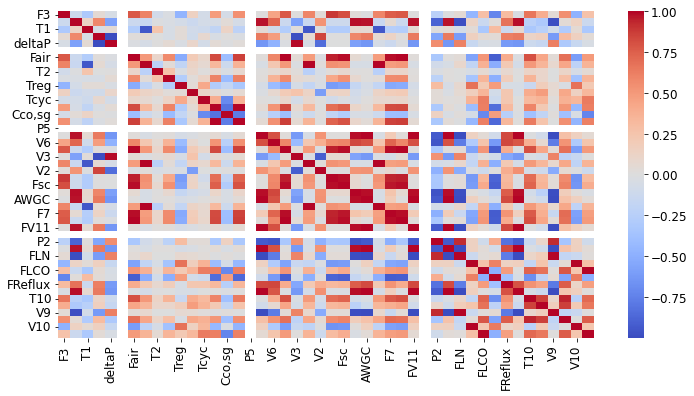

In [8]:
sns.heatmap(df_deltaP_increase.corr(),cmap='coolwarm')

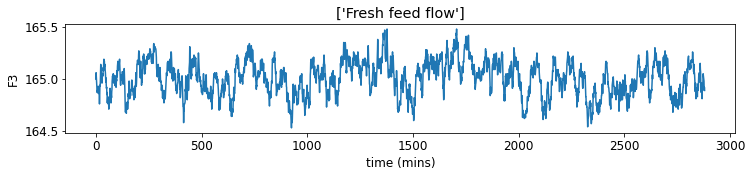

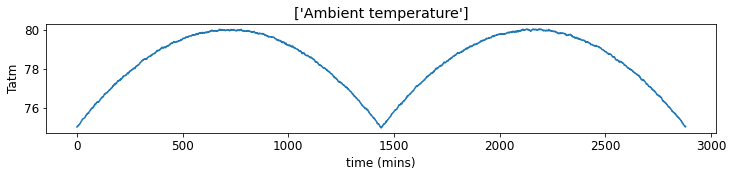

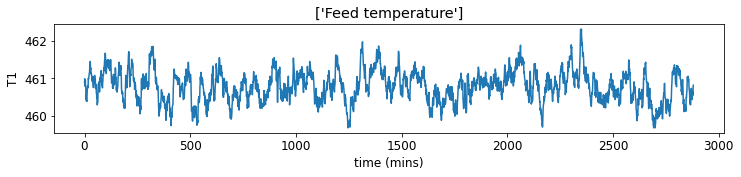

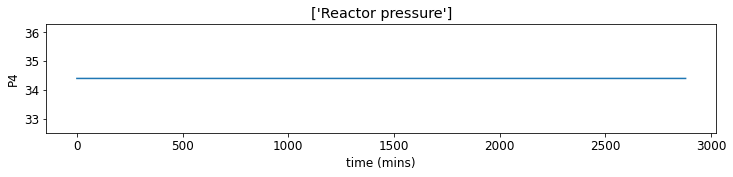

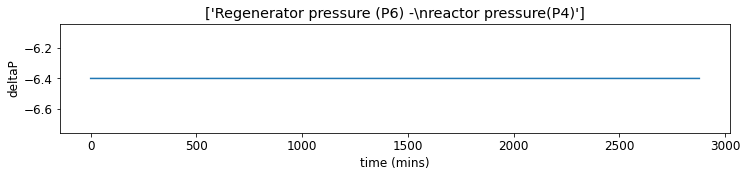

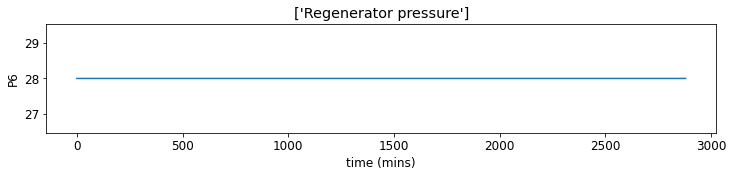

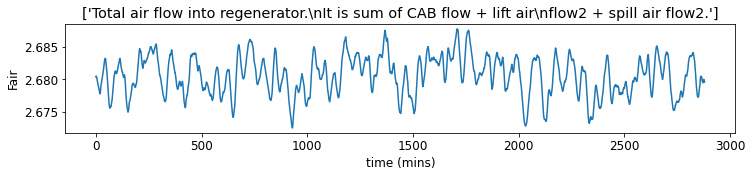

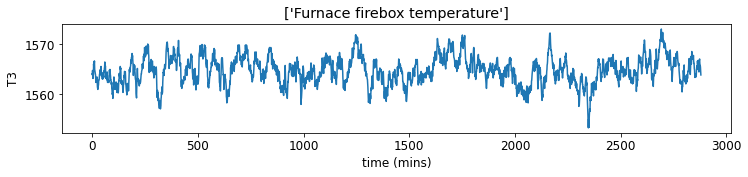

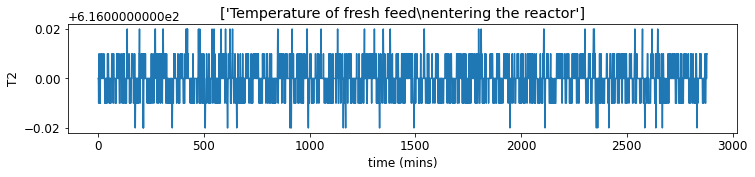

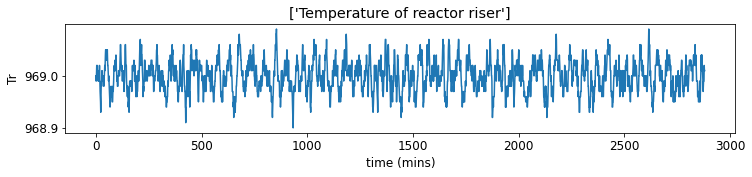

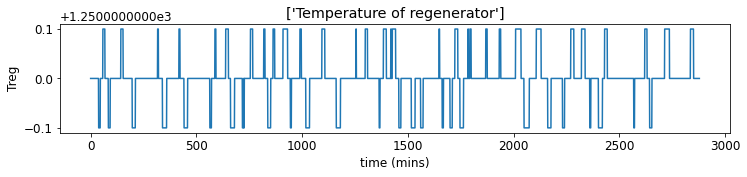

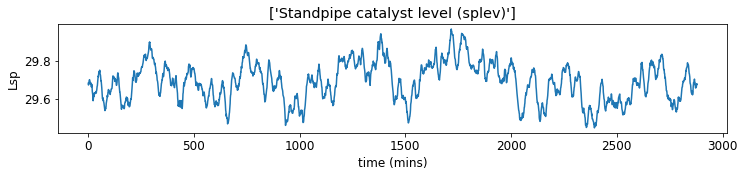

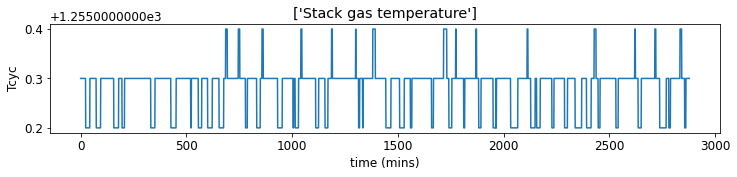

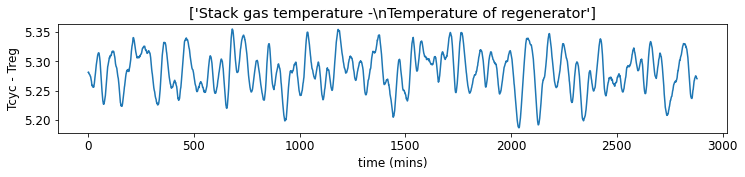

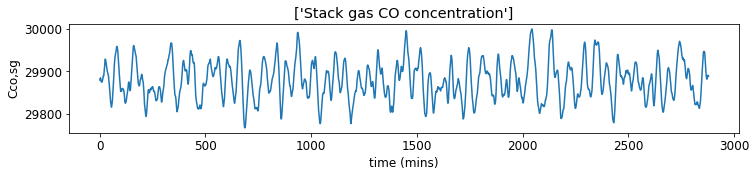

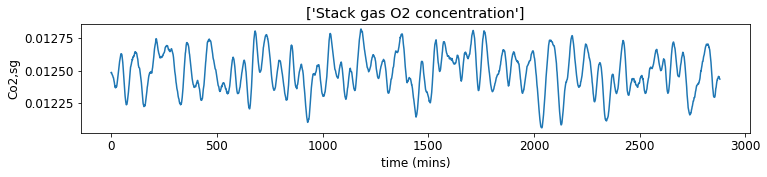

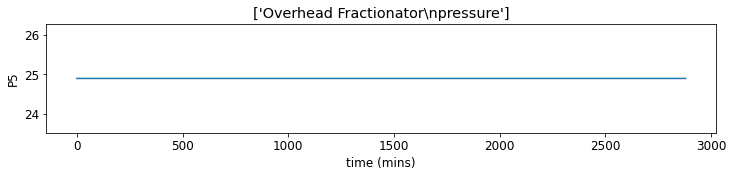

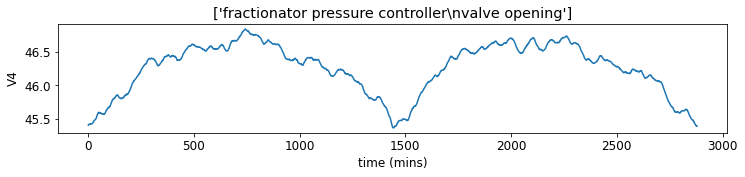

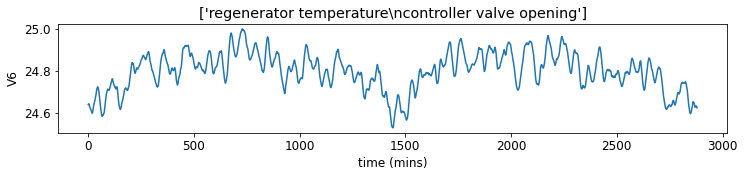

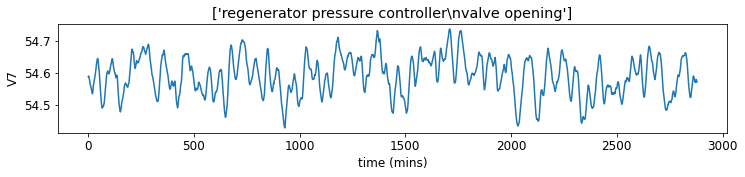

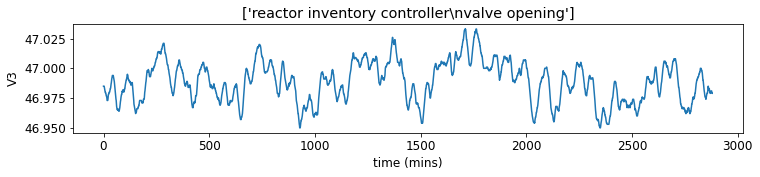

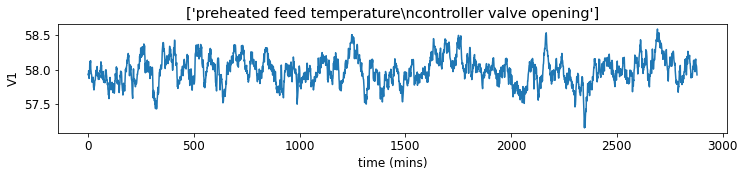

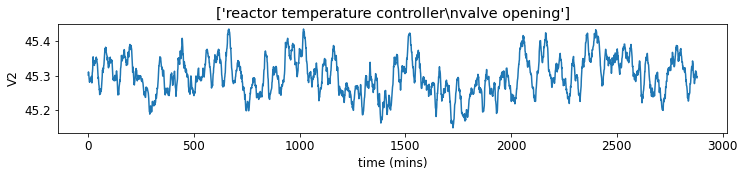

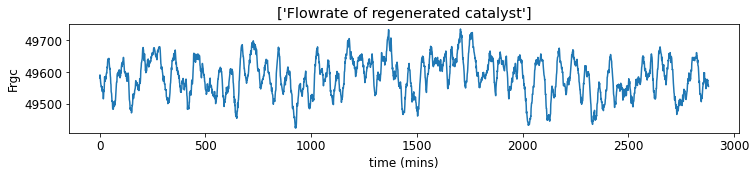

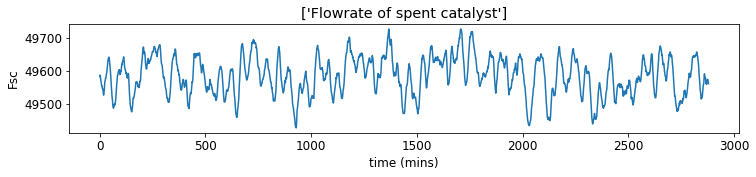

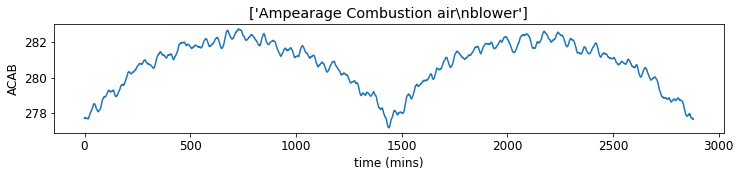

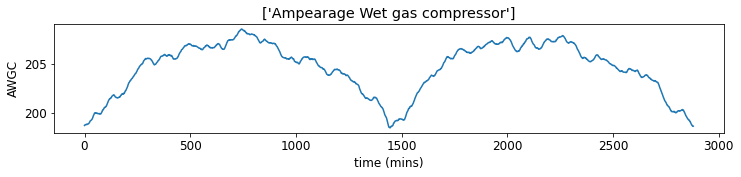

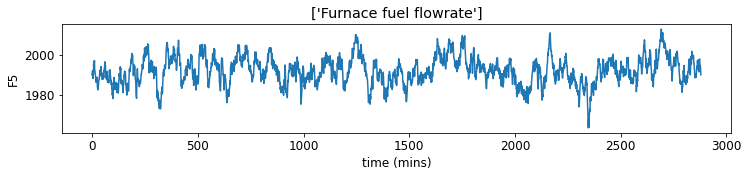

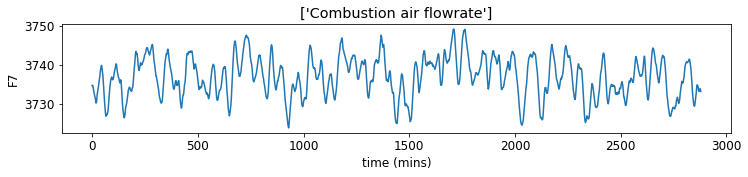

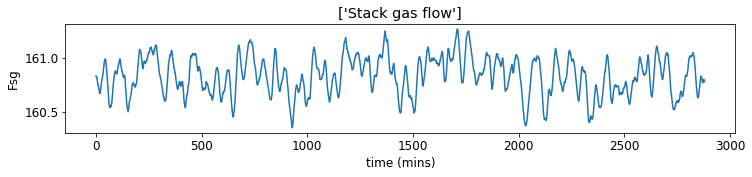

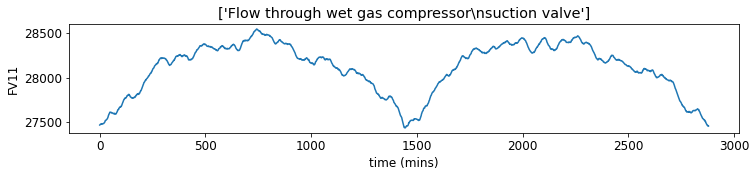

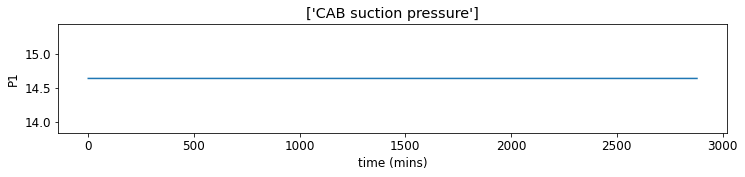

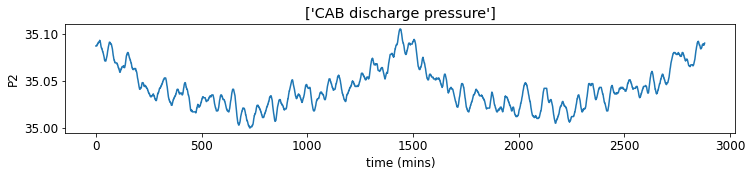

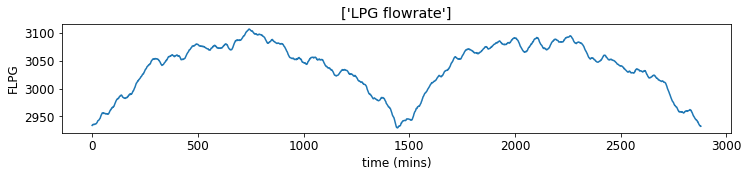

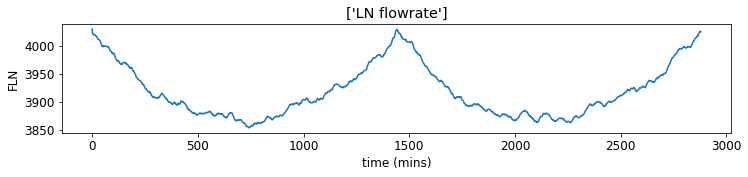

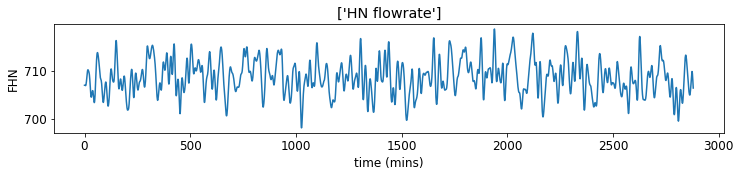

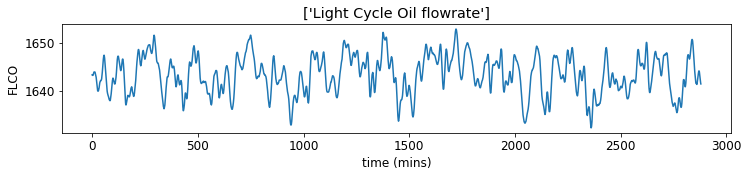

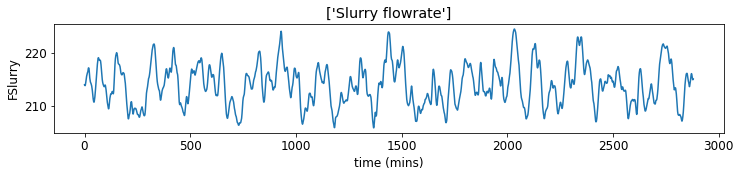

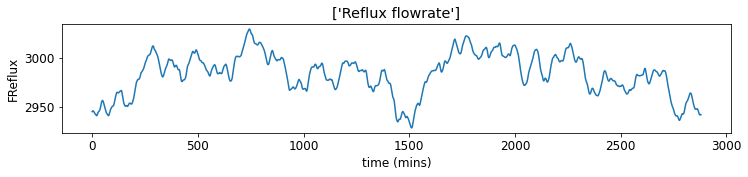

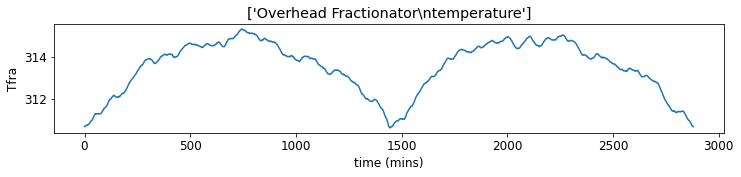

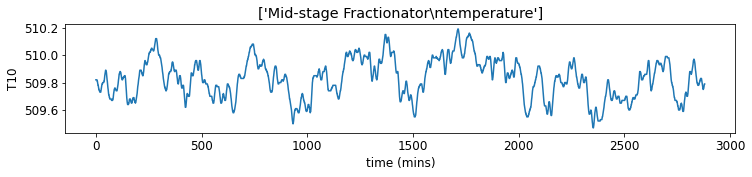

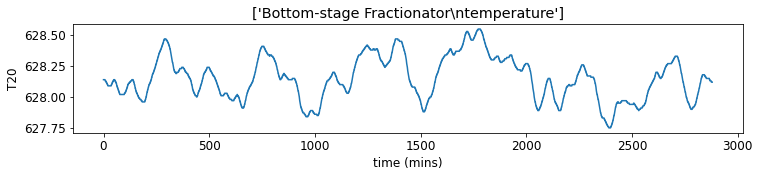

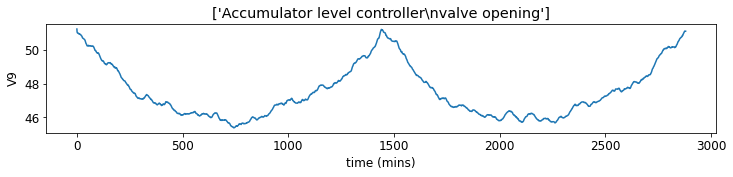

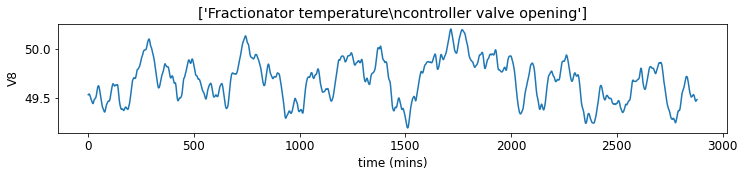

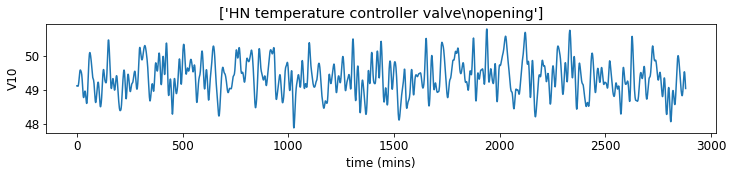

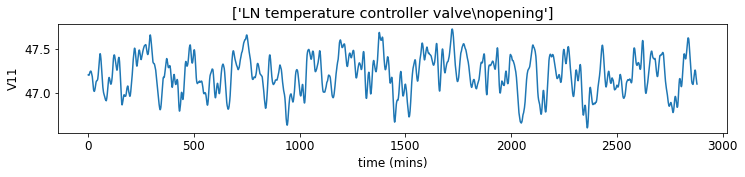

In [9]:
for n,i in enumerate(df_stableFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_stableFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

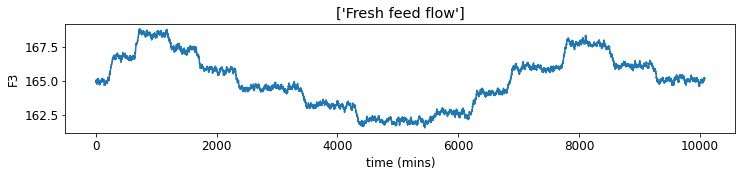

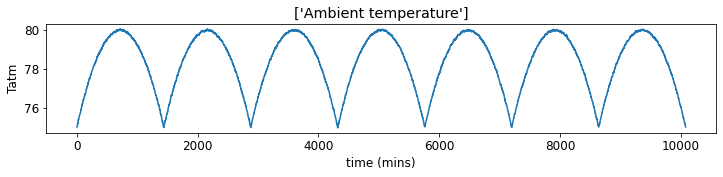

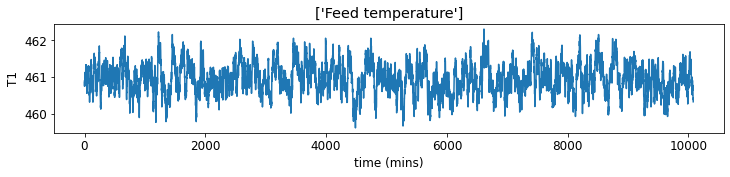

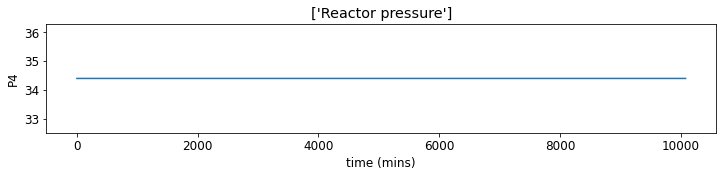

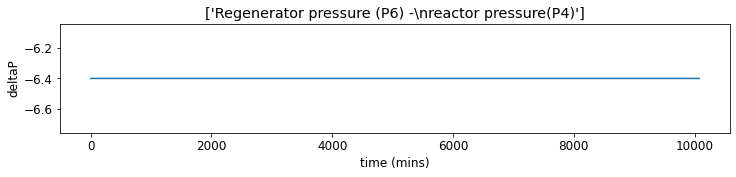

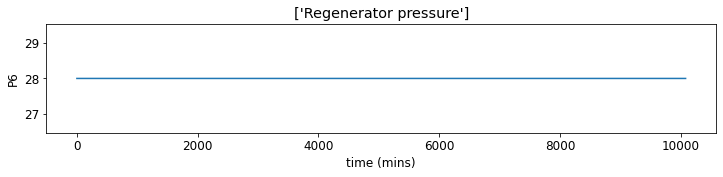

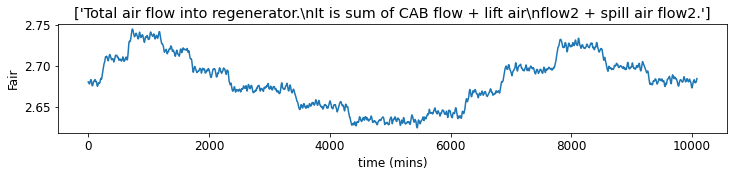

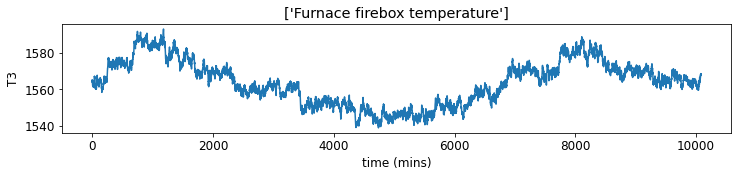

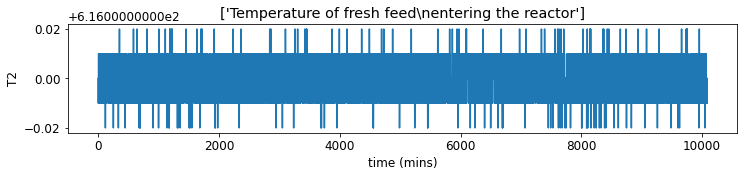

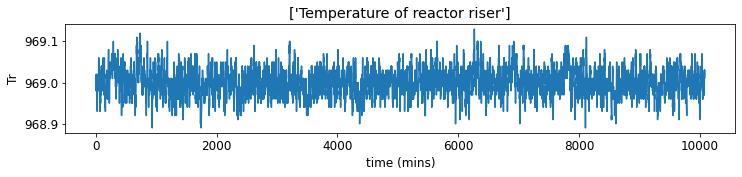

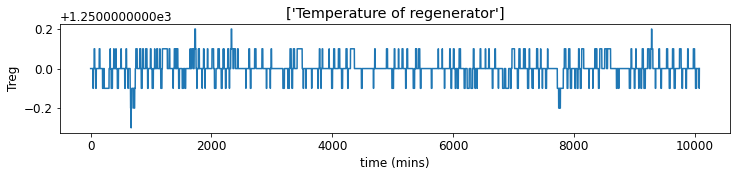

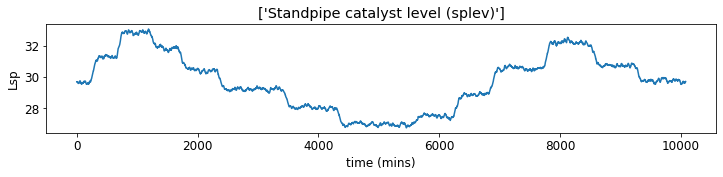

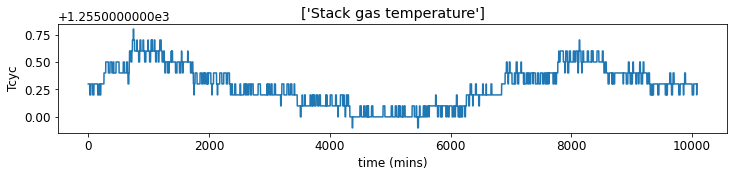

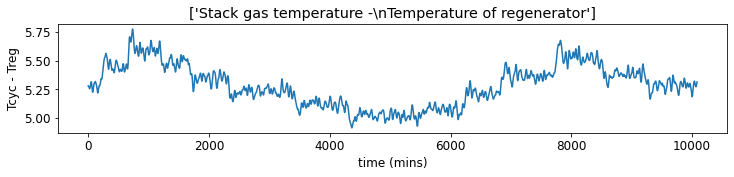

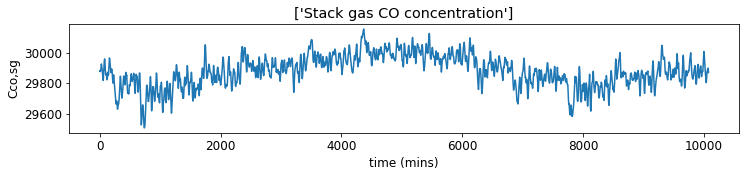

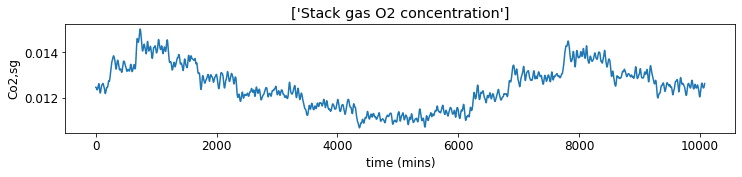

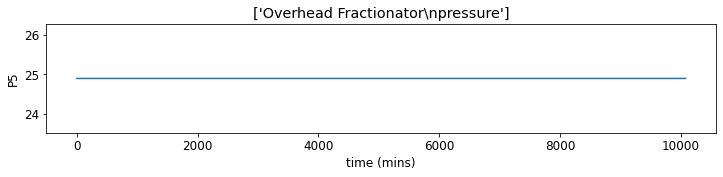

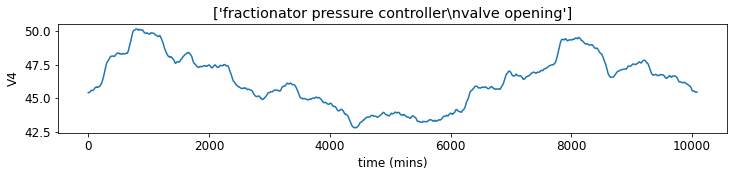

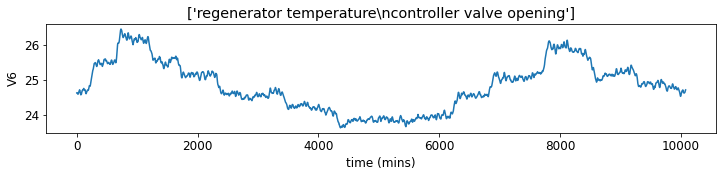

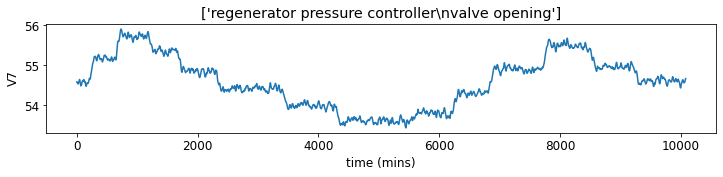

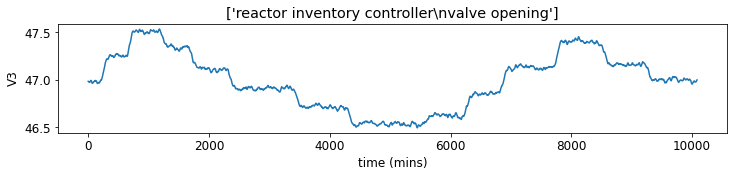

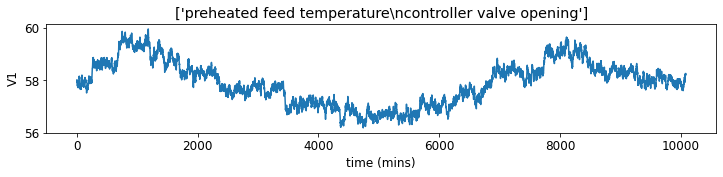

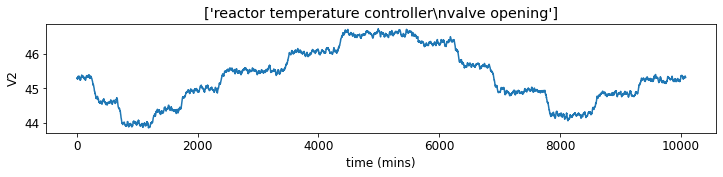

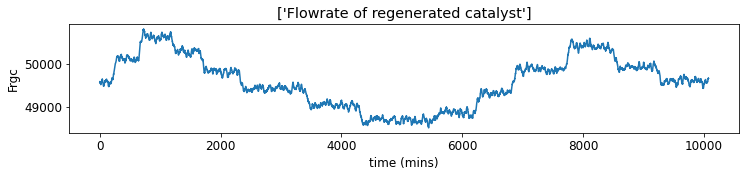

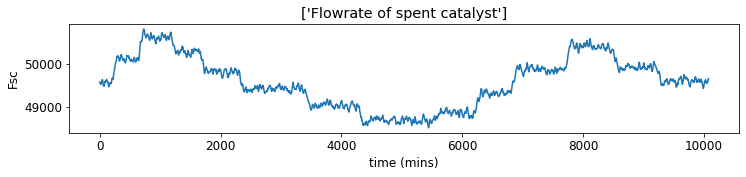

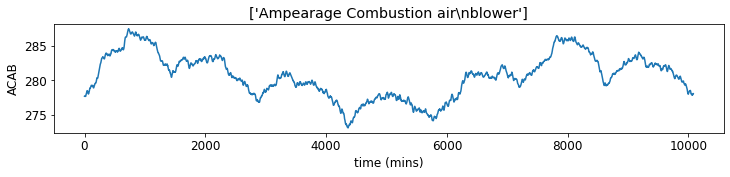

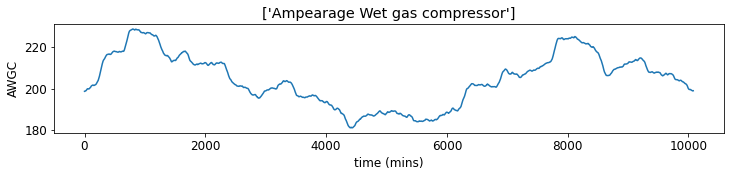

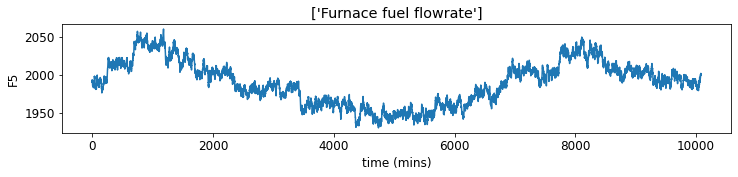

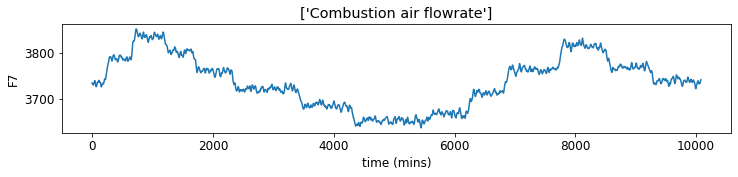

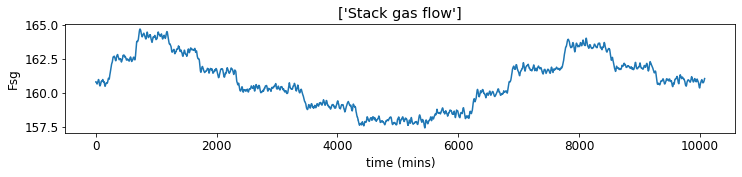

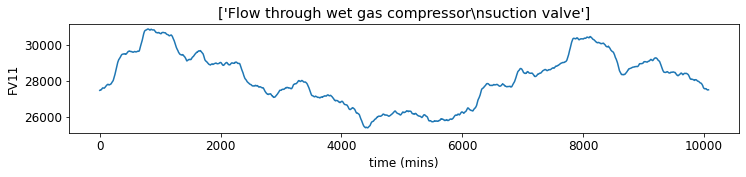

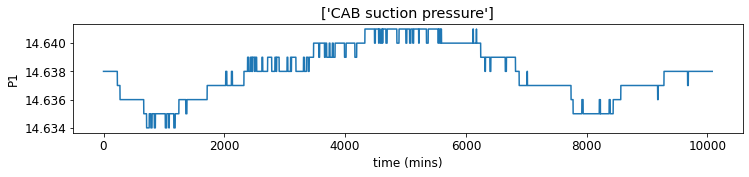

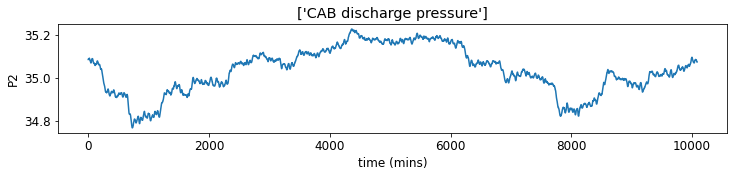

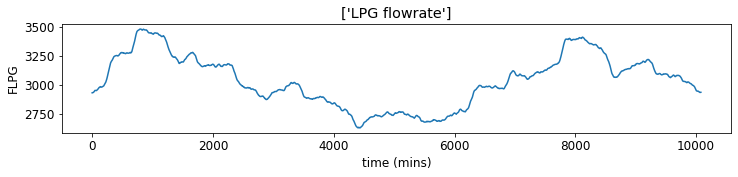

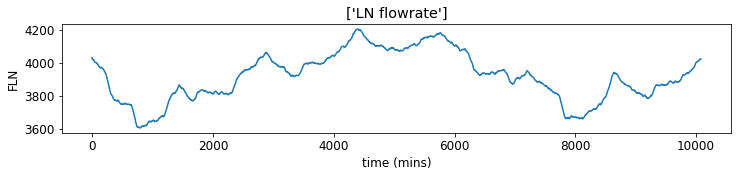

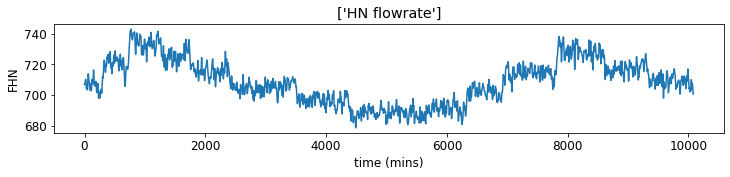

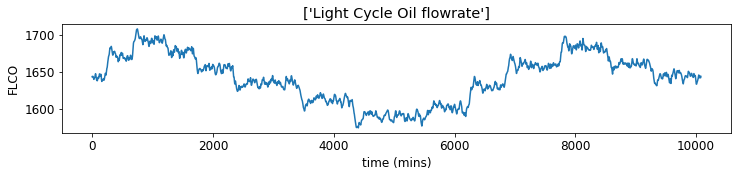

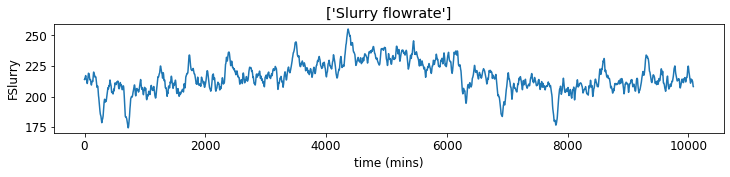

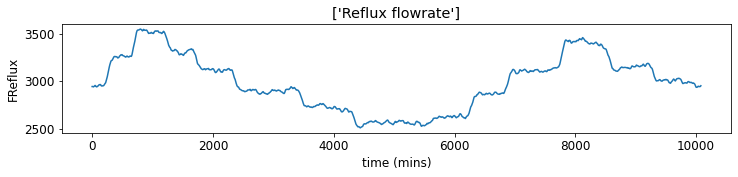

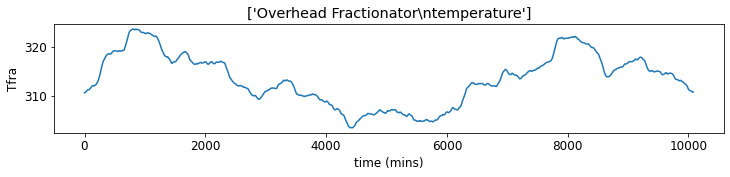

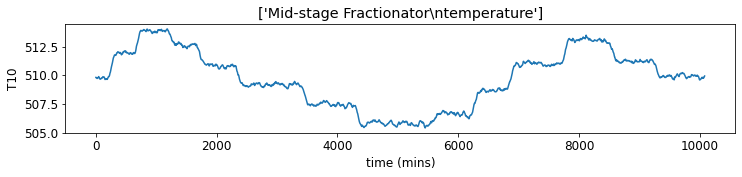

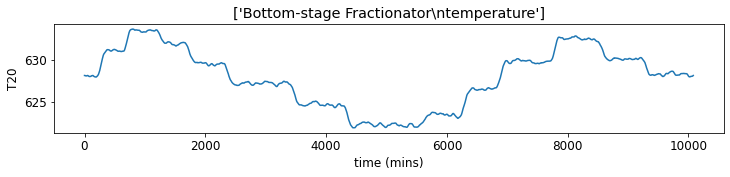

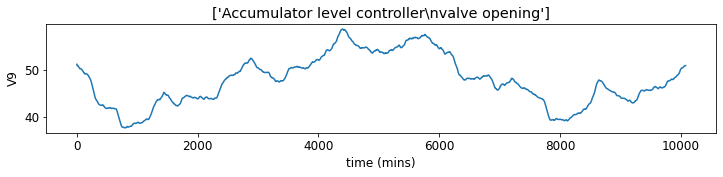

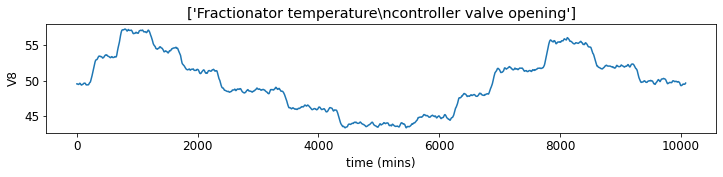

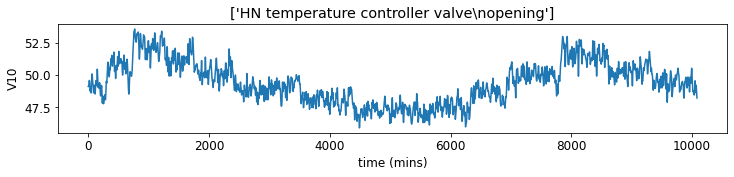

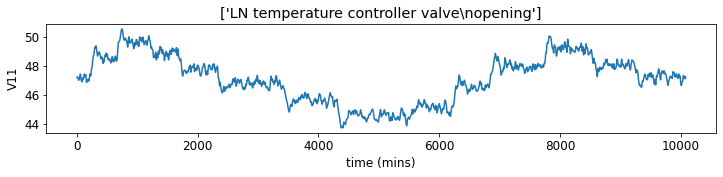

In [10]:
for n,i in enumerate(df_varyingFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_varyingFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

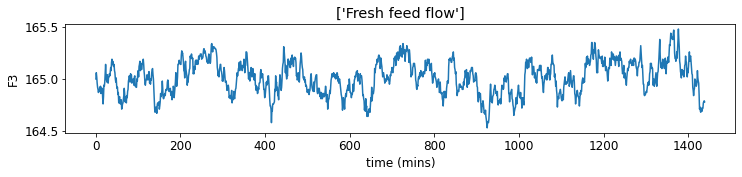

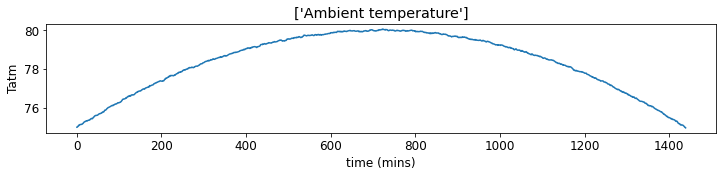

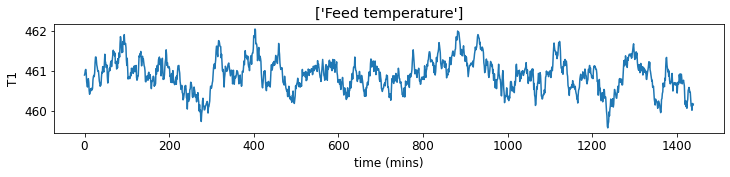

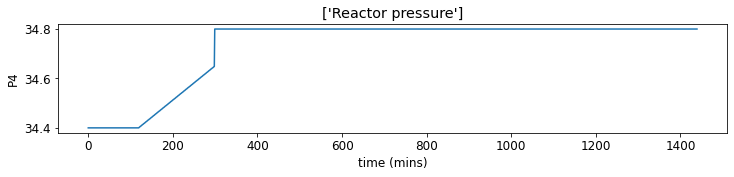

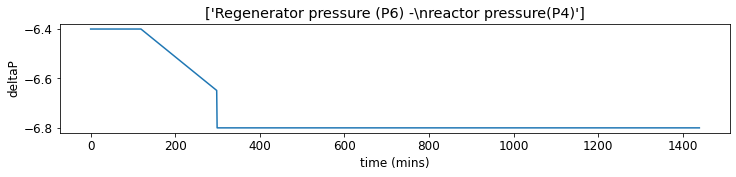

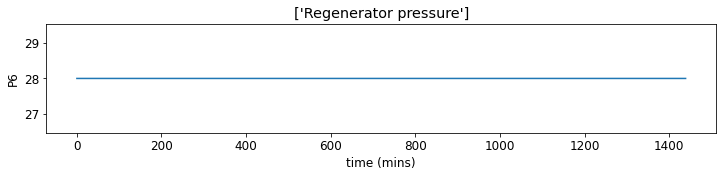

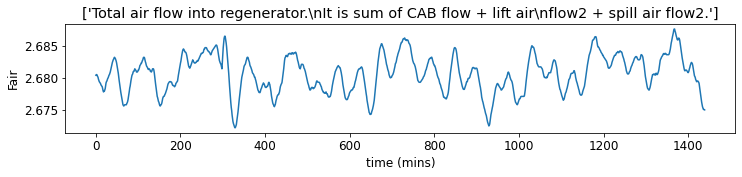

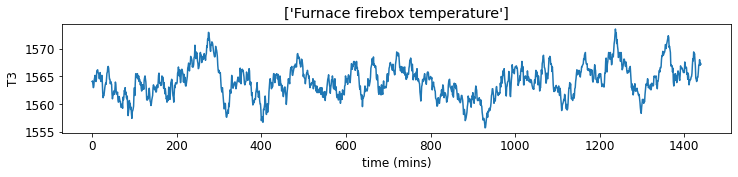

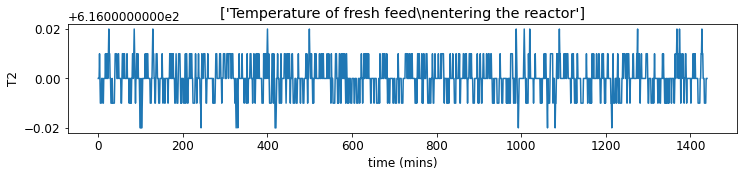

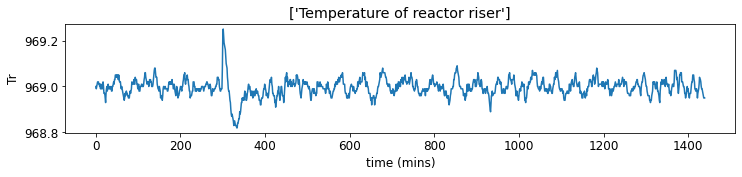

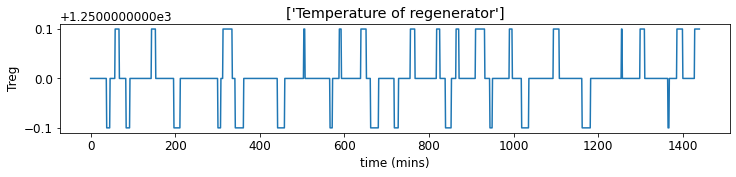

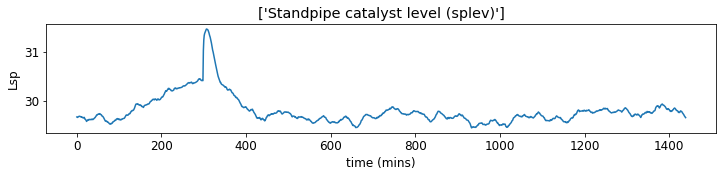

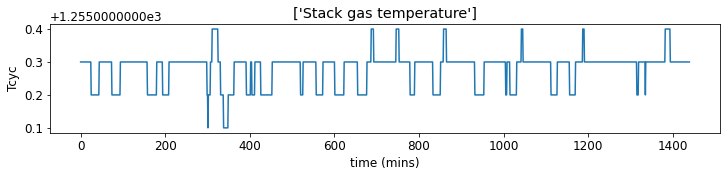

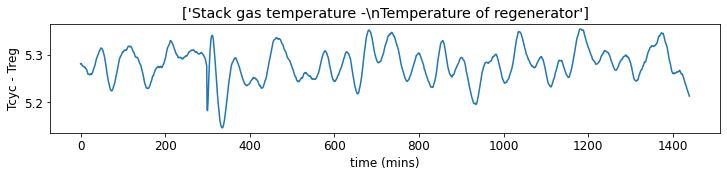

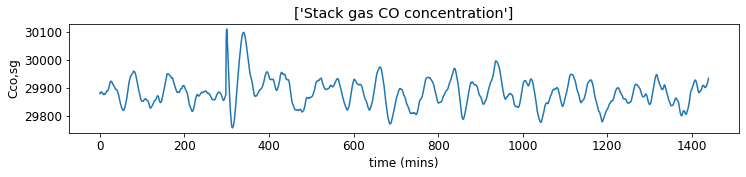

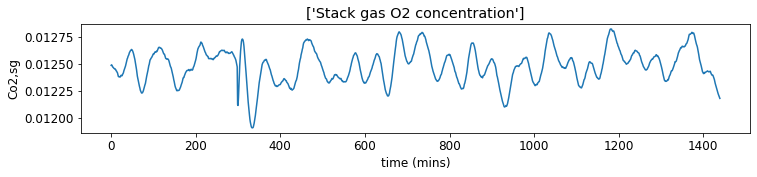

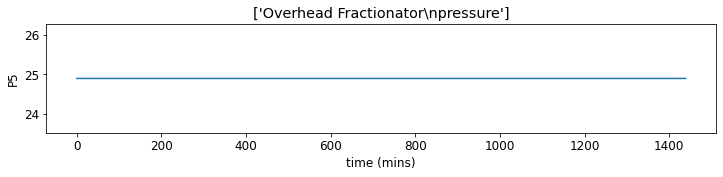

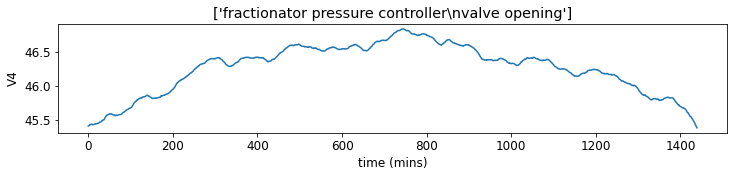

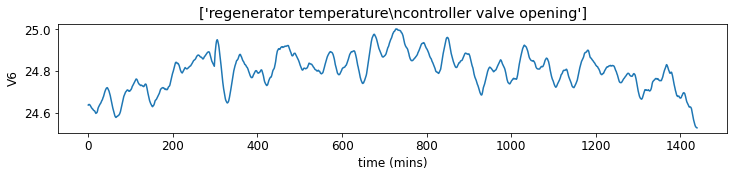

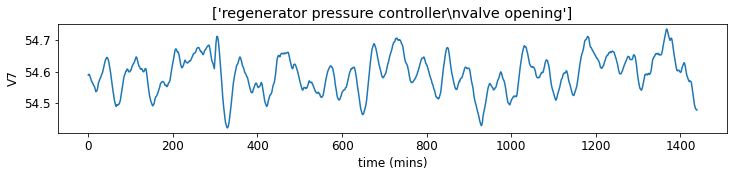

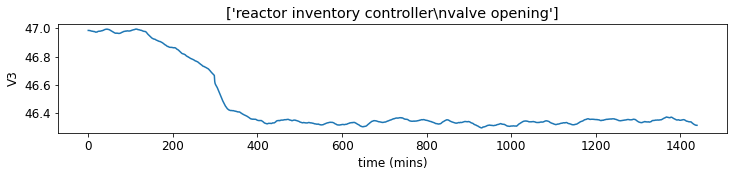

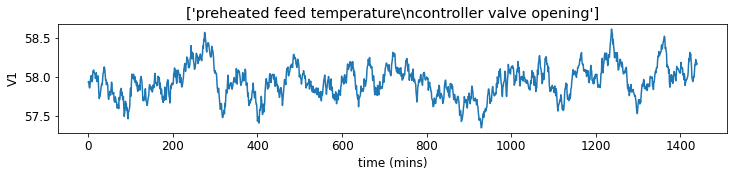

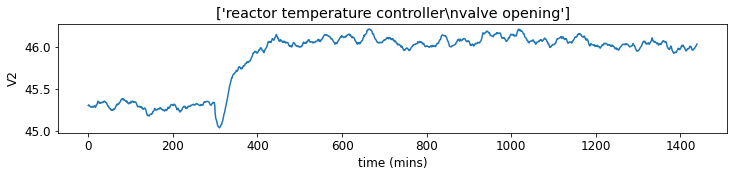

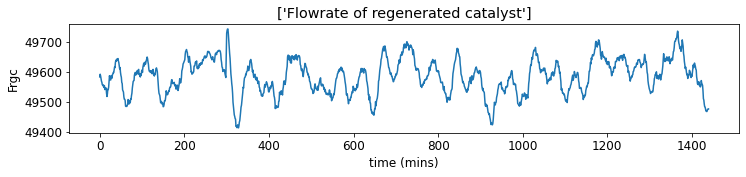

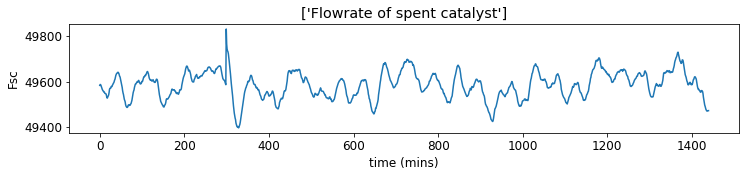

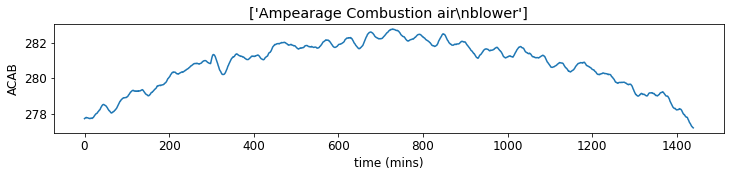

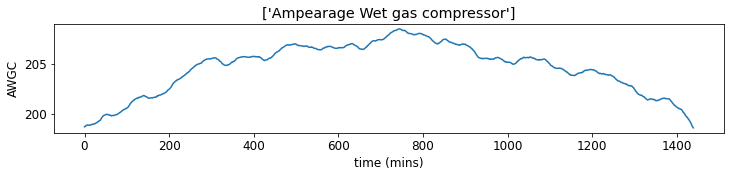

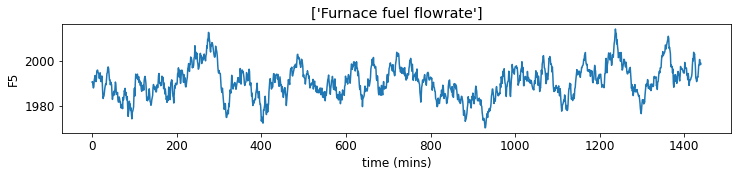

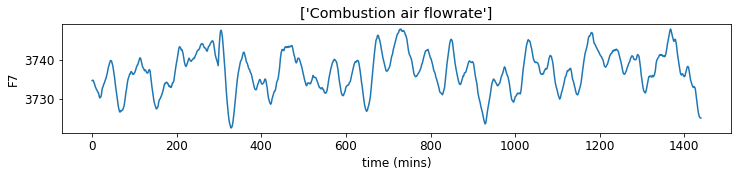

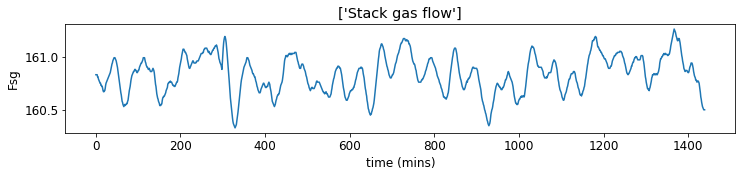

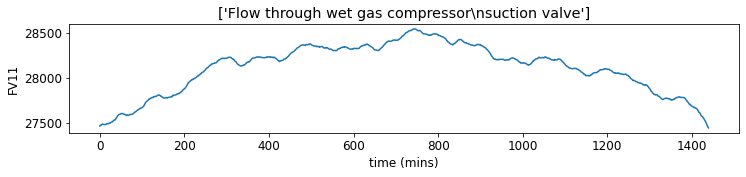

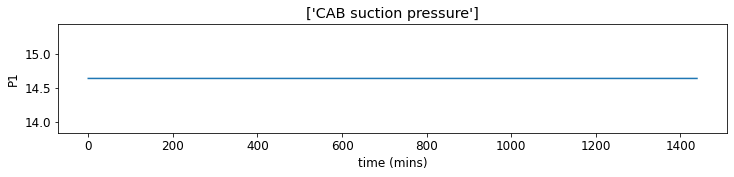

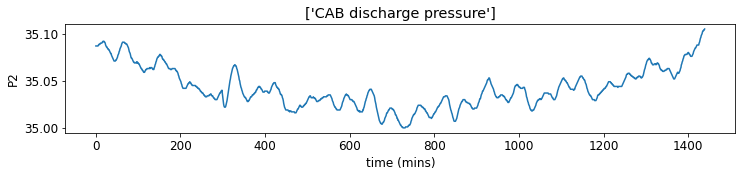

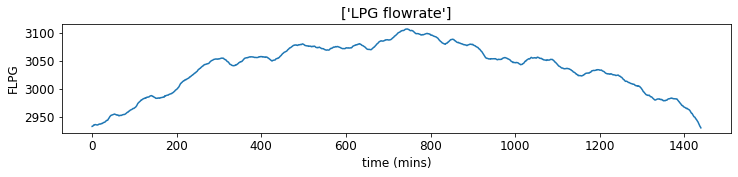

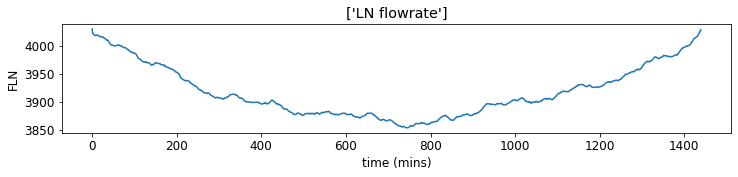

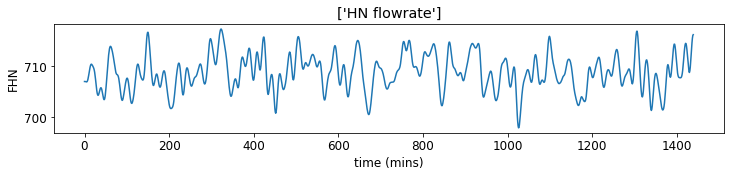

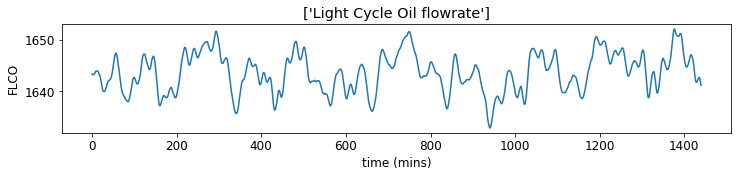

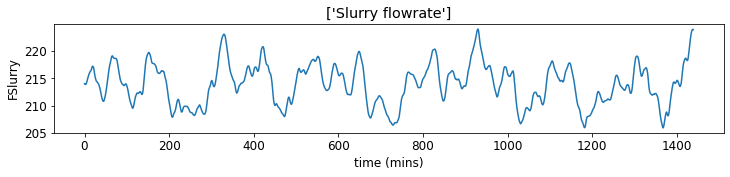

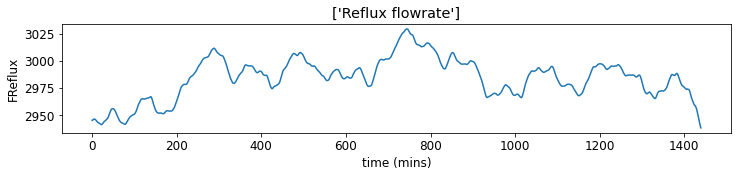

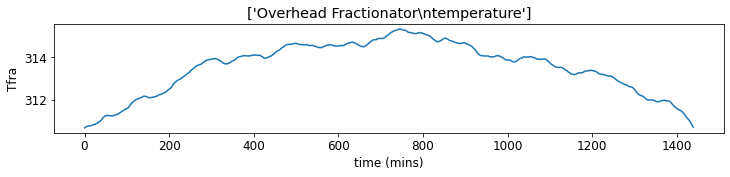

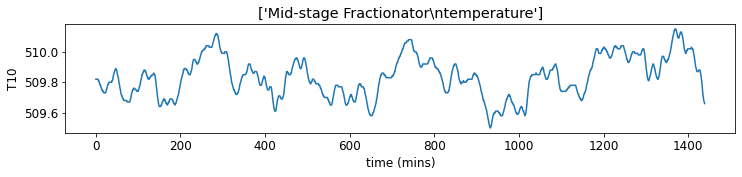

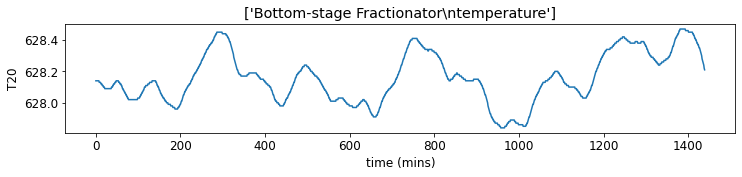

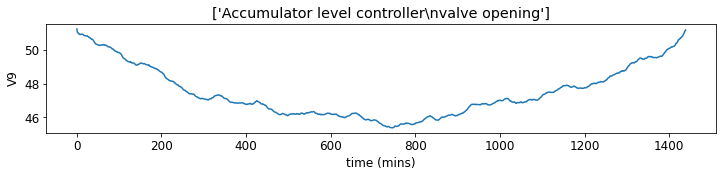

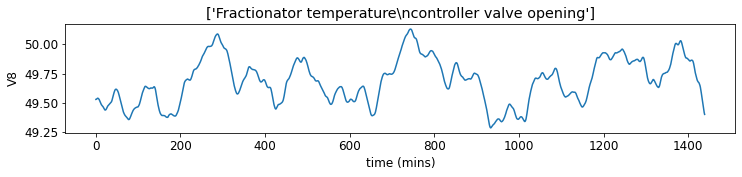

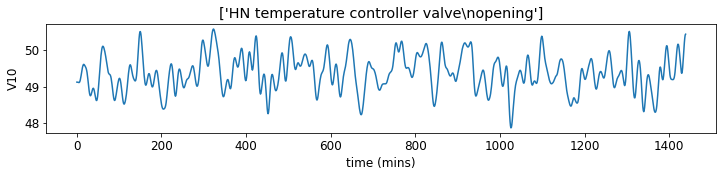

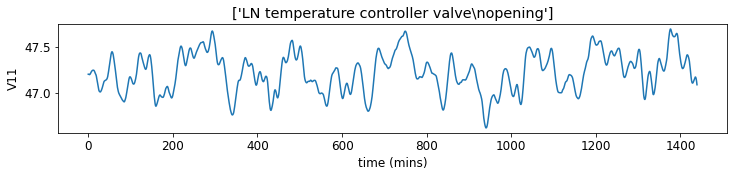

In [11]:
for n,i in enumerate(df_deltaP_increase.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_deltaP_increase[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
ss = StandardScaler()
pca = PCA()

In [13]:
X = ss.fit_transform(df_stableFeedFlow)
X_pca = pca.fit_transform(X)

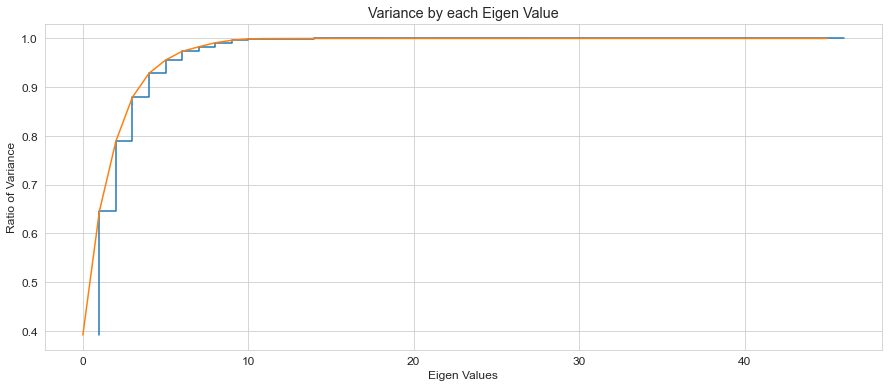

In [14]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,47)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,46)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

In [15]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

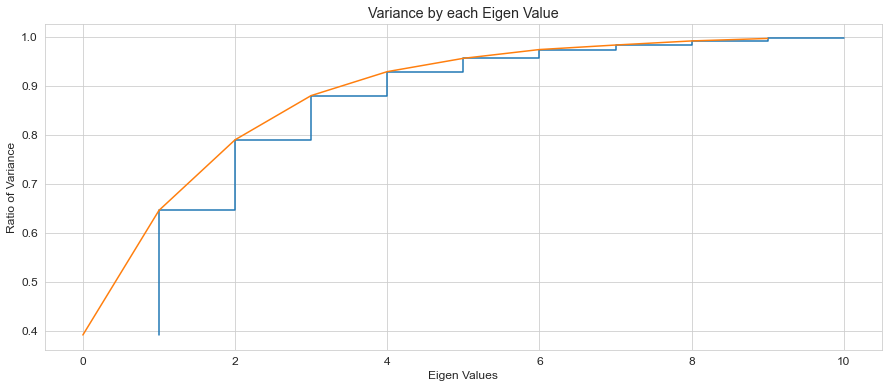

In [16]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,11)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,10)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

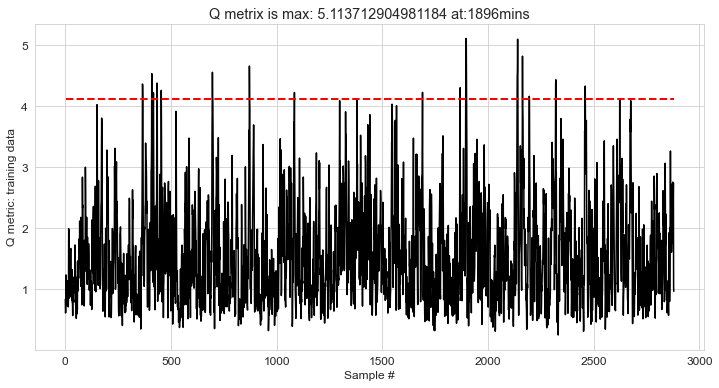

In [17]:
X_reconstructed = np.dot(X_pca,pca.components_)
error_pca = X-X_reconstructed
Q_train = np.sum(np.abs(error_pca),axis=1)
Q_CL = np.percentile(Q_train,99)
# Q_train plot with CL
plt.figure()
plt.plot(Q_train, color='black')
plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Q metric: training data')
plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
plt.show()

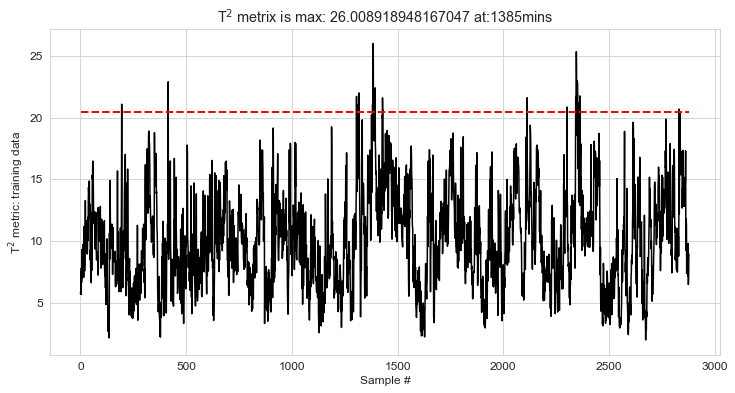

In [18]:
lambda_ = np.diag(pca.explained_variance_)
lambda_inv = np.linalg.inv(lambda_)
T_train = np.zeros(X_pca.shape[0])
for i in range(X_pca.shape[0]):
    T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
T_CL = np.percentile(T_train,99)
# T2_train plot with CL
plt.figure()
plt.plot(T_train, color='black')
plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('T$^2$ metric: training data')
plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
plt.show()

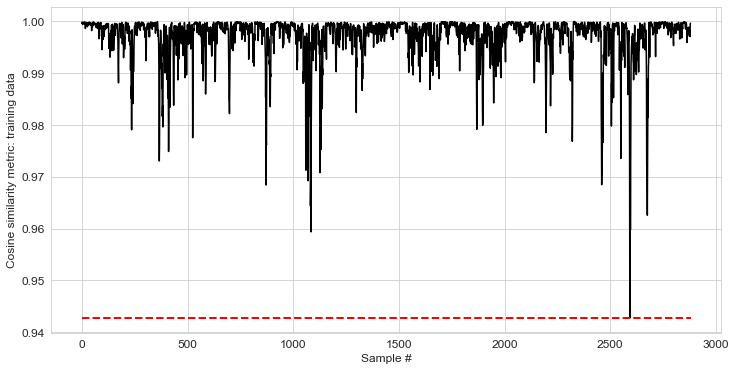

In [19]:
cosine = []
ed = []
for i in range(X.shape[0]):
    v1 = X[i]
    v2 = np.dot(X_pca,pca.components_)[i]
    cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
    ed.append(np.linalg.norm(v1 - v2))
C_CL = np.min(cosine)
E_CL = np.percentile(ed,99)
# pd.Series(ed).plot(color='black')
# plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
# plt.show()
pd.Series(cosine).plot(color='black')
plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Cosine similarity metric: training data')
plt.show()

In [20]:
Q_CL,T_CL,C_CL,E_CL

(4.12311321551907, 20.424350352568787, 0.9427550112367165, 0.9281694746755793)

In [21]:
def Q_test(X,X_pca,pca_components_,Q_CL):
    X_reconstructed = np.dot(X_pca,pca_components_)
    error = X-X_reconstructed
    Q_train = np.sum(np.abs(error),axis=1)
    # Q_train plot with CL
    plt.figure()
    plt.plot(Q_train, color='black')
    plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Q metric: training data')
    plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
    plt.show()
    return error

In [22]:
def T_test(X_pca,explained_variance_,TCL):
    lambda_ = np.diag(pca.explained_variance_)
    lambda_inv = np.linalg.inv(lambda_)
    T_train = np.zeros(X_pca.shape[0])
    for i in range(X_pca.shape[0]):
        T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
    # T2_train plot with CL
    plt.figure()
    plt.plot(T_train, color='black')
    plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('T$^2$ metric: training data')
    plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
    plt.show()

In [23]:
def cosine(X,X_transformed,pca_components_,C_CL,E_CL):
    cosine = []
    ed = []
    for i in range(X.shape[0]):
        v1 = X[i]
        v2 = np.dot(X_transformed,pca_components_)[i]
        cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
        ed.append(np.linalg.norm(v1 - v2))
#     pd.Series(ed).plot(color='black')
#     plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
#     plt.xlabel('Sample #')
#     plt.ylabel('Eucledian Distance metric: training data')
#     plt.show()
    pd.Series(cosine).plot(color='black')
    plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Cosine similarity metric: training data')
    plt.show()

In [24]:
X = ss.transform(df_varyingFeedFlow)
X_test = pca.transform(X)

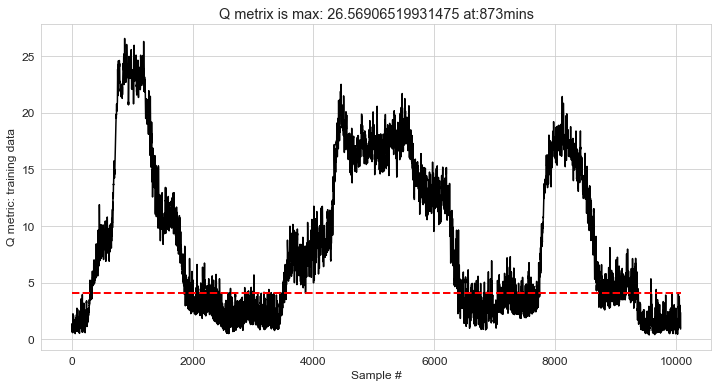

In [25]:
error = Q_test(X,X_test,pca.components_,Q_CL)

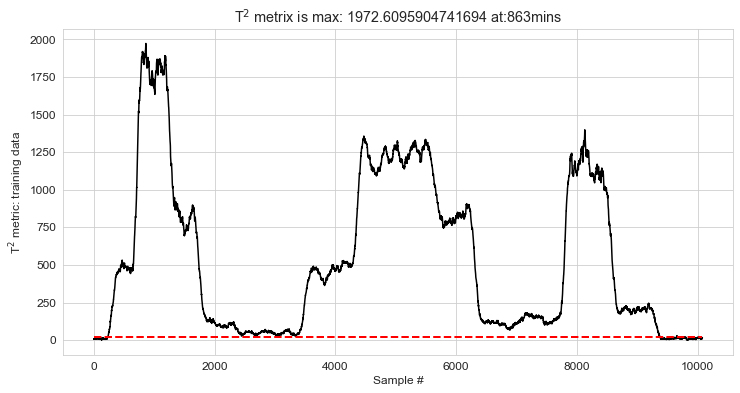

In [26]:
T_test(X_test,pca.explained_variance_,T_CL)

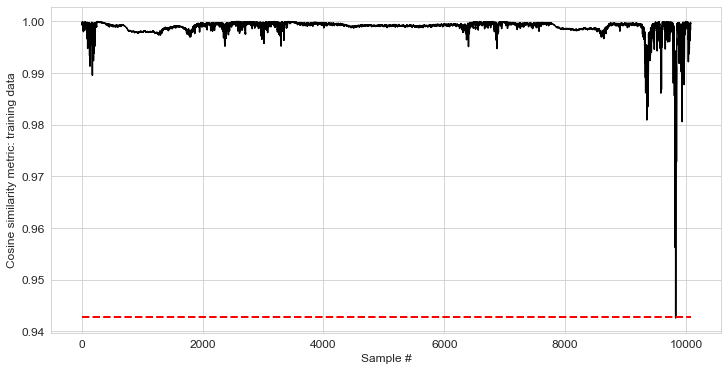

In [27]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

In [28]:
X = ss.transform(df_deltaP_increase)
X_test = pca.transform(X)

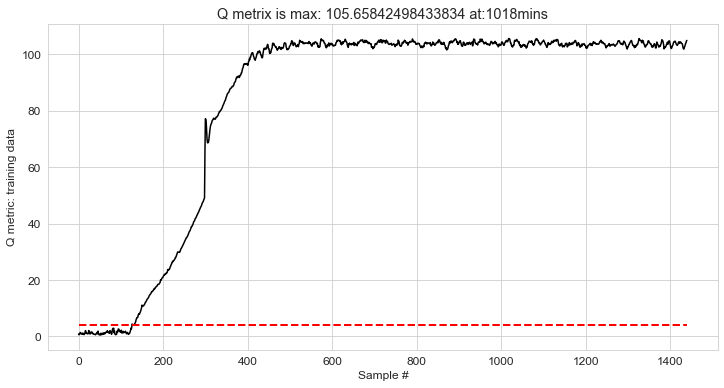

In [29]:
error = Q_test(X,X_test,pca.components_,Q_CL)

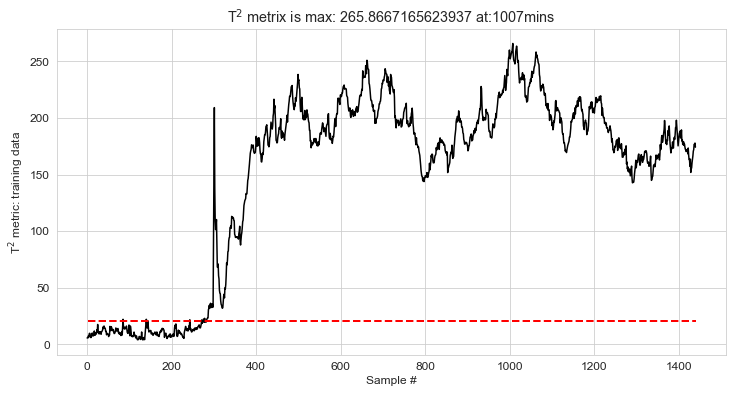

In [30]:
T_test(X_test,pca.explained_variance_,T_CL)

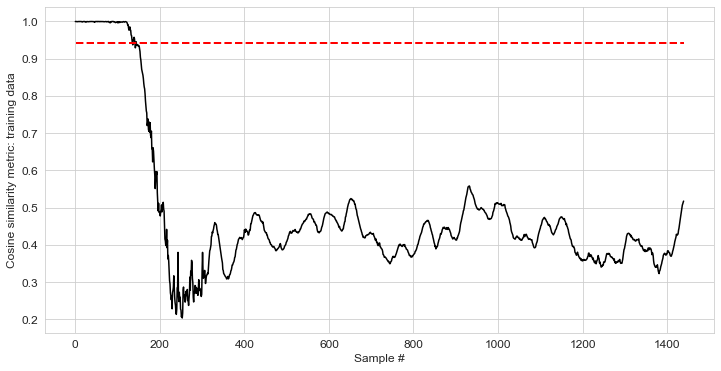

In [31]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

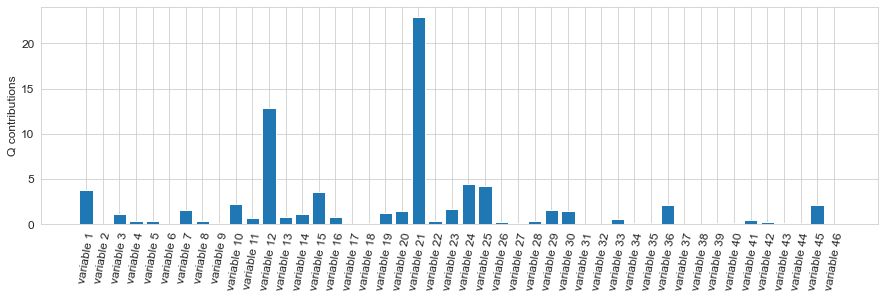

In [32]:
#%% Q contribution
sample = 300

error_test_sample = error[sample]
Q_contri = np.abs(error_test_sample) # *error_test_sample # vector of contributions

plt.figure(figsize=[15,4])
plt.bar(['variable ' + str((i+1)) for i in range(len(Q_contri))], Q_contri)
plt.xticks(rotation = 80)
plt.ylabel('Q contributions')
plt.show()

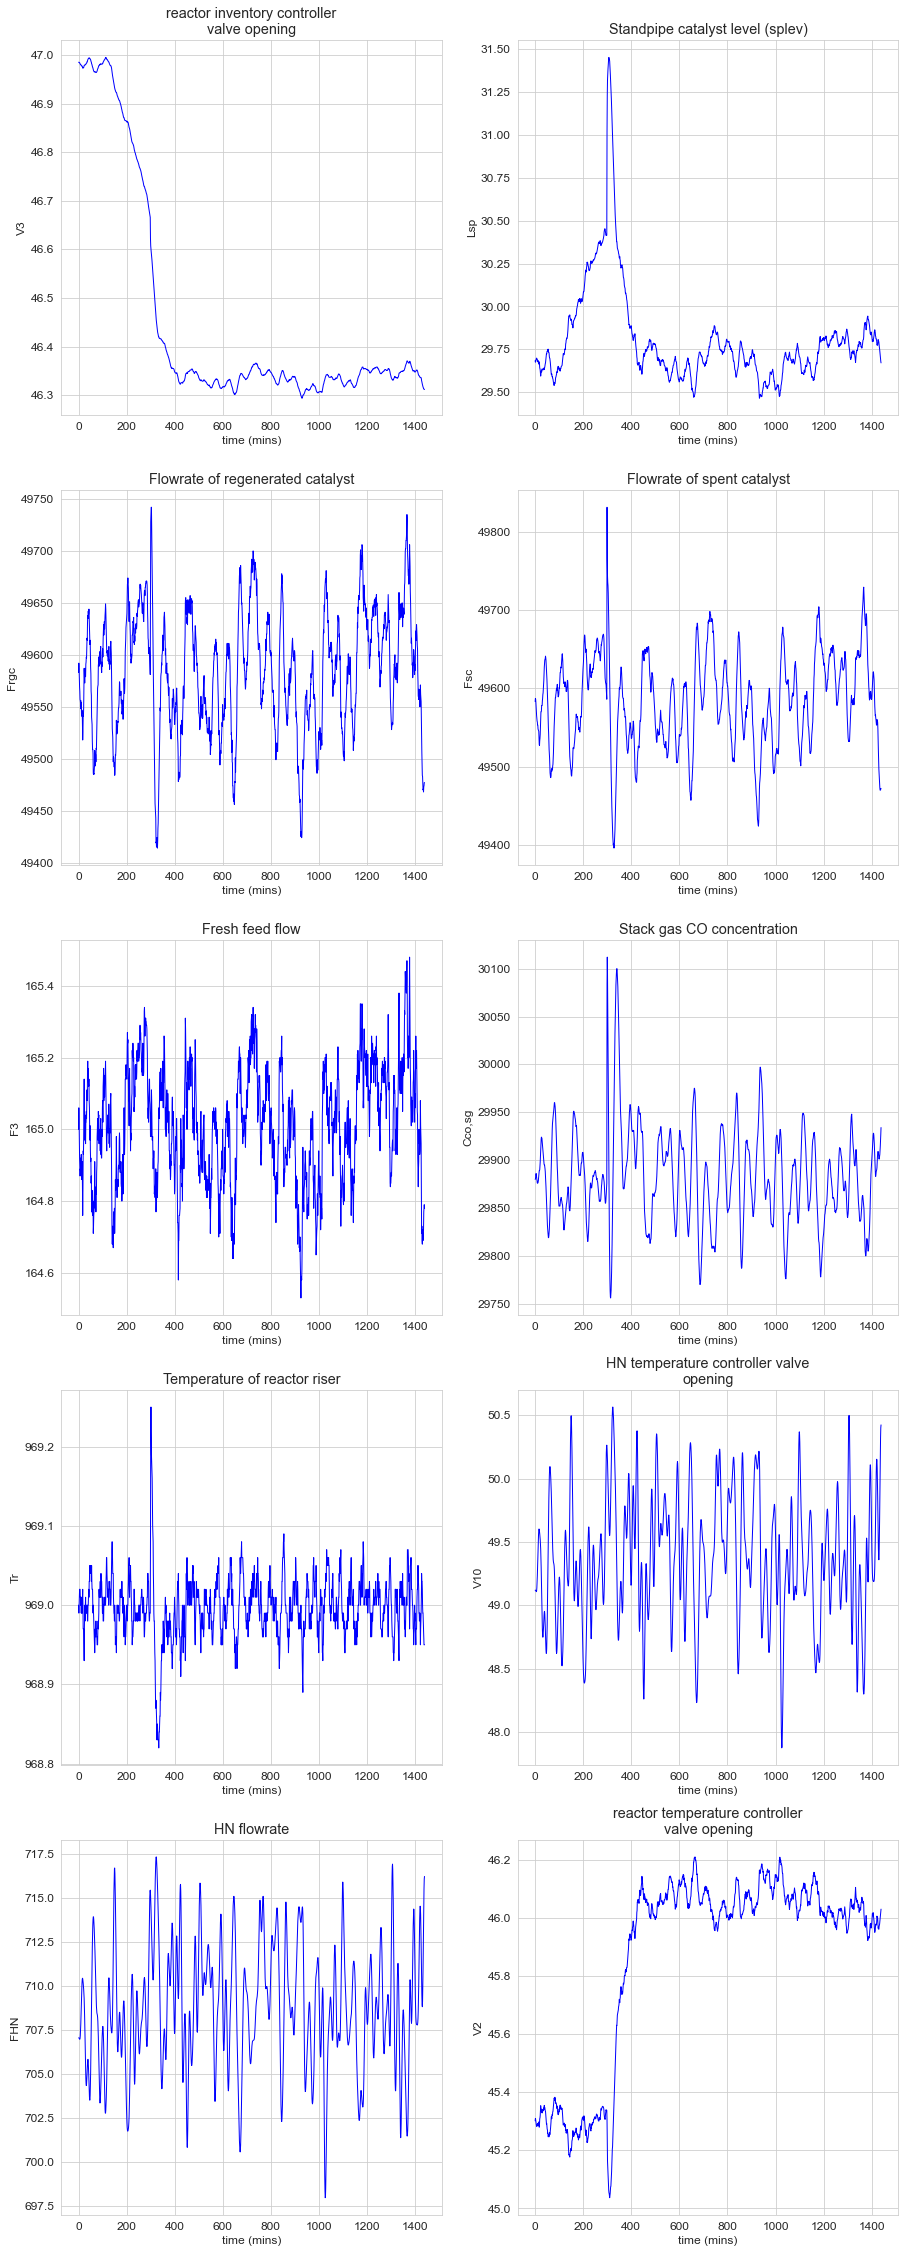

In [33]:
plt.figure(figsize=(15,40))
for i,n in enumerate(np.argsort(Q_contri)[:-11:-1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_deltaP_increase.iloc[:,n],'blue', linewidth=1)
    plt.xlabel('time (mins)')
    plt.ylabel(df['Symbol'][n])
    plt.title(df['Description'][n])
    plt.show